Для инвестирования 5 млн руб. и cтавки купона, равного 20% разработайте внебиржевой опцион “Autocallable” с ежеквартальным купоном и возможностью досрочного автоматического погашения опциона каждые 3 месяца, если на ежеквартальную купонную дату текущая цена бумаги с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance) превышает или равна барьеру отзыва.

Если продукт не был отозван досрочно, и на последнюю купонную дату текущая цена worst of превышает или равна барьеру поставки, то продукт погашается с выплатой 100% номинала. Иначе, если хотя бы один базовый актив опциона оказался ниже барьера поставки, то осуществляется выплата денежных средств в сумме, равной эквиваленту «поставки бумаги», бумаги с наибольшим снижением относительно своей первоначальной стоимости, по ее первоначальной цене.

В корзину включить четыре базовых актива, первоначальную стоимость определить на день, предшествующий дате запуска (100%). Установить барьер отзыва 105%, купонный барьер 98%, барьер поставки 90% в процентах от первоначальной стоимости каждого базового актива корзину.

**Дата запуска:** 27-07-2022.

**Дата погашения:** 25-07-2023.

**Даты ежеквартальных наблюдений:** 25-10-2022, 25-01-2023, 25-04-2023.

1. Определить действия на купонные даты (выплачивается купон; выплачивается купон с досрочным погашением продукта; не выплачивается, но запоминается; выплачивается купон за текущий и предыдущие кварталы; производится погашение продукта с «эффектом поставки»).
1. Вычислить финансовый результат по состоянию на 25-04-2023,
определить бумагу с наибольшим снижением относительно своей первоначальной стоимости.
1. Привести иллюстративные графики, на которых отобразить бумагу с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance), купонные даты и действия в эти даты, уровни барьеров отзыва, поставки и купонного барьера, первоначальную стоимость актива,
провести исследование влияния уровней барьеров (барьер отзыва, купонный барьер, барьер поставки) на финансовый результат.
1. Повторить расчеты для метода оценки базовых активов -- средневзвешенная динамика стоимости всех активов (average-of perfomance).

[Примеры графиков и расчетов.](https://www.open-broker.com/files/Presentation_OTC-Option_Autocallable_.pdf)


Финансовый результат: 0.0014%


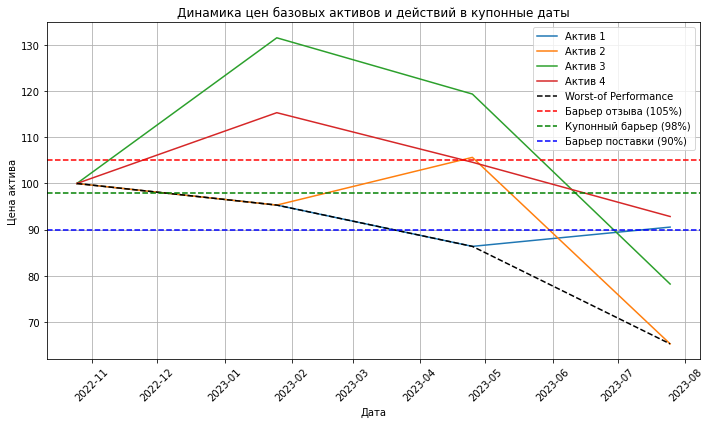

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Исходные данные
initial_price = 100  # Изначальная стоимость каждого актива
coupon_rate = 0.20  # Купонная ставка
barrier_call = 1.05  # Барьер отзыва (105%)
coupon_barrier = 0.98  # Купонный барьер (98%)
delivery_barrier = 0.90  # Барьер поставки (90%)
T = 1  # Время до погашения в годах
n_quarters = 4  # Количество кварталов

# Даты наблюдений
dates = pd.to_datetime(["2022-10-25", "2023-01-25", "2023-04-25", "2023-07-25"])

# Симуляция цен активов (используем случайные изменения цены с нормальным распределением)
np.random.seed(42)
n_assets = 4  # Количество активов
price_changes = np.random.normal(0, 0.2, size=(n_quarters, n_assets))  # Нормальные случайные изменения цен

# Инициализация начальных цен для активов
prices = np.ones((n_quarters, n_assets)) * initial_price

# Симуляция динамики цен
for i in range(1, n_quarters):
    prices[i] = prices[i-1] * (1 + price_changes[i])

# Досрочные погашения и купонные выплаты
coupon_payments = np.zeros(n_quarters)
early_redemptions = np.zeros(n_quarters)
worst_of_performance = np.min(prices, axis=1)  # worst-of performance (минимальная цена за квартал)

# Расчет купонных выплат и досрочных погашений
for i in range(n_quarters):
    # Проверка на купонный барьер
    if np.all(prices[i] >= initial_price * coupon_barrier):
        coupon_payments[i] = coupon_rate * initial_price / 4  # Купон за квартал
    # Проверка на досрочное погашение
    if np.min(prices[i]) >= initial_price * barrier_call:
        early_redemptions[i] = initial_price  # Продукт погашен досрочно
        break

# Если продукт не был погашен досрочно, проверяем на дату погашения
final_payment = 0
if early_redemptions[-1] == 0:
    if np.min(prices[-1]) >= initial_price * delivery_barrier:
        final_payment = initial_price  # Погашение по 100% номинала
    else:
        # Выплата с "эффектом поставки"
        worst_asset = np.argmin(prices[-1])
        final_payment = prices[-1][worst_asset]  # Поставляется бумага с наибольшим снижением

# Финансовый результат
total_payment = coupon_payments.sum() + final_payment
investment = 5000000  # Инвестиция 5 млн рублей
result = (total_payment / investment) * 100  # Результат в процентах

# Выводим результат
print(f"Финансовый результат: {result:.4f}%")

# Построение графиков
plt.figure(figsize=(10, 6))

# График цен активов
for i in range(n_assets):
    plt.plot(dates[:n_quarters], prices[:, i], label=f"Актив {i+1}")

# График worst-of performance
plt.plot(dates[:n_quarters], worst_of_performance, label="Worst-of Performance", color='black', linestyle='--')

# Барьеры
plt.axhline(y=initial_price * barrier_call, color='r', linestyle='--', label="Барьер отзыва (105%)")
plt.axhline(y=initial_price * coupon_barrier, color='g', linestyle='--', label="Купонный барьер (98%)")
plt.axhline(y=initial_price * delivery_barrier, color='b', linestyle='--', label="Барьер поставки (90%)")

# Настройки графика
plt.title("Динамика цен базовых активов и действий в купонные даты")
plt.xlabel("Дата")
plt.ylabel("Цена актива")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Расчет среднего значения динамики стоимости активов
avg_of_performance = np.mean(prices, axis=1)

# Инициализация начальных значений для купонных выплат и досрочных погашений
coupon_payments_avg = np.zeros(n_quarters)
early_redemptions_avg = np.zeros(n_quarters)

# Расчет купонных выплат и досрочных погашений для average-of performance
for i in range(n_quarters):
    # Проверка на купонный барьер
    if avg_of_performance[i] >= initial_price * coupon_barrier:
        coupon_payments_avg[i] = coupon_rate * initial_price / 4  # Купон за квартал
    # Проверка на досрочное погашение
    if avg_of_performance[i] >= initial_price * barrier_call:
        early_redemptions_avg[i] = initial_price  # Продукт погашен досрочно
        break

# Расчет финансового результата для average-of performance
total_payment_avg = coupon_payments_avg.sum() + final_payment
result_avg = (total_payment_avg / investment) * 100  # Результат в процентах

# Вывод результата
print(f"Финансовый результат для average-of performance: {result_avg:.4f}%")


Финансовый результат для average-of performance: 0.0015%
